In [311]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
pd.set_option('display.max_columns', 500)

In [312]:
df = pd.read_csv('data_25_26/merged_gw.csv')
df.columns

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'clearances_blocks_interceptions', 'creativity',
       'defensive_contribution', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'modified',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'starts',
       'tackles', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [313]:
df.head(5)

,name,position,team,xP,assists,bonus,bps,clean_sheets,clearances_blocks_interceptions,creativity,defensive_contribution,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,modified,opponent_team,own_goals,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,starts,tackles,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Reinildo Mandava,DEF,Sunderland,0.5,0,0,27,1,6,2.5,8,541,0.00,0.00,0.0,0.56,5,0,0,1.6,13.6,2025-08-16T14:00:00Z,90,False,19,0,0,0,3,0,1,0,677026,1,2,0,3,0.0,6,0,0,0,40,True,0,1
1,Lewis Dobbin,MID,Aston Villa,1.0,0,0,0,0,0,0.0,0,57,0.00,0.00,0.0,0.00,2,0,0,0.0,0.0,2025-08-16T11:30:00Z,0,False,15,0,0,0,0,0,1,0,4994,0,0,0,0,0.0,0,0,0,0,50,True,0,1
2,Ryan Christie,MID,Bournemouth,0.0,0,0,0,0,0,0.0,0,87,0.00,0.00,0.0,0.00,1,0,0,0.0,0.0,2025-08-15T19:00:00Z,0,False,12,0,0,0,0,0,1,0,10562,0,0,2,4,0.0,0,0,0,0,50,False,0,1
3,Zeki Amdouni,FWD,Burnley,0.0,0,0,0,0,0,0.0,0,216,0.00,0.00,0.0,0.00,6,0,0,0.0,0.0,2025-08-16T14:00:00Z,0,False,18,0,0,0,0,0,1,0,6453,0,0,0,3,0.0,0,0,0,0,50,False,0,1
4,Lucas Tolentino Coelho de Lima,MID,West Ham,2.6,0,0,11,0,0,14.2,6,612,0.08,0.08,0.0,0.68,5,3,0,2.4,5.8,2025-08-16T14:00:00Z,90,False,17,0,0,0,5,0,1,0,110926,1,1,0,3,4.0,2,0,0,0,60,False,0,1


In [314]:
# df = df[(df['starts'] == 1) & (df['position']=='DEF')]
df = df[(df['starts'] == 1) & ((df['position']=='DEF') | (df['position']=='MID'))]
df.shape

(4303, 46)

In [315]:
teams_df = pd.read_csv('data_25_26/teams.csv')
teams_df = teams_df.rename(columns={'id': 'team_id'})
teams_df.head(5)

,code,draw,form,team_id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,NaN,1,0,Arsenal,0,0,1,ARS,5,NaN,False,0,1300,1375,1340,1400,1260,1350,1
1,7,0,NaN,2,0,Aston Villa,0,0,3,AVL,3,NaN,False,0,1145,1185,1150,1170,1140,1200,2
2,90,0,NaN,3,0,Burnley,0,0,19,BUR,3,NaN,False,0,1055,1095,1010,1090,1100,1100,43
3,91,0,NaN,4,0,Bournemouth,0,0,12,BOU,3,NaN,False,0,1150,1220,1100,1240,1200,1200,127
4,94,0,NaN,5,0,Brentford,0,0,7,BRE,3,NaN,False,0,1135,1175,1100,1110,1170,1240,130


In [316]:
"""
Merge team ids and strength to fixtures in gameweeks dataset
"""
merged_df = pd.merge(df,
                     teams_df[['team_id','short_name', 'strength', 'strength_overall_home', 'strength_overall_away','strength_attack_home',
                     'strength_attack_away','strength_defence_home','strength_defence_away']],
                     how='left',
                     left_on='opponent_team',
                     right_on='team_id')

In [317]:
merged_df

,name,position,team,xP,assists,bonus,bps,clean_sheets,clearances_blocks_interceptions,creativity,defensive_contribution,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,modified,opponent_team,own_goals,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,starts,tackles,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,team_id,short_name,strength,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away
0,Reinildo Mandava,DEF,Sunderland,0.5,0,0,27,1,6,2.5,8,541,0.00,0.00,0.00,0.56,5,0,0,1.6,13.6,2025-08-16T14:00:00Z,90,False,19,0,0,0,3,0,1,0,677026,1,2,0,3,0.0,6,0,0,0,40,True,0,1,19,WHU,3,1075,1075,1050,1050,1100,1100
1,Lucas Tolentino Coelho de Lima,MID,West Ham,2.6,0,0,11,0,0,14.2,6,612,0.08,0.08,0.00,0.68,5,3,0,2.4,5.8,2025-08-16T14:00:00Z,90,False,17,0,0,0,5,0,1,0,110926,1,1,0,3,4.0,2,0,0,0,60,False,0,1,17,SUN,3,1100,1145,1100,1120,1100,1170
2,Pape Matar Sarr,MID,Spurs,2.0,1,0,29,1,4,18.7,10,593,0.22,0.22,0.00,0.94,6,0,0,5.4,33.2,2025-08-16T14:00:00Z,90,False,3,0,0,0,4,0,1,0,267148,1,2,0,3,2.0,6,0,0,0,50,True,0,1,3,BUR,3,1055,1095,1010,1090,1100,1100
3,Marcos Senesi Barón,DEF,Bournemouth,0.9,0,0,1,0,12,14.6,15,72,0.05,0.05,0.00,2.21,1,4,0,4.3,26.6,2025-08-15T19:00:00Z,90,False,12,0,0,0,2,0,1,0,66685,1,3,2,4,2.0,2,0,0,0,45,False,0,1,12,LIV,4,1230,1265,1170,1210,1290,1320
4,Alexis Mac Allister,MID,Liverpool,3.2,1,0,27,0,1,15.2,6,386,0.02,0.05,0.03,1.49,1,1,0,5.4,27.4,2025-08-15T19:00:00Z,71,False,4,0,0,0,2,0,1,0,150572,1,3,2,4,11.0,5,0,0,0,65,True,0,1,4,BOU,3,1150,1220,1100,1240,1200,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,Sander Berge,MID,Fulham,3.8,0,0,19,0,4,18.3,8,330,0.12,0.31,0.19,1.79,236,3,0,4.2,18.6,2026-02-01T14:00:00Z,90,False,14,0,0,0,3,0,24,0,9882,1,1,2,3,5.0,2,-407,340,747,49,False,0,24,14,MUN,3,1135,1205,1100,1150,1170,1260
4299,Matty Cash,DEF,Aston Villa,4.0,0,0,16,0,4,40.8,8,36,0.33,0.56,0.23,0.38,231,1,0,9.5,24.4,2026-02-01T14:00:00Z,90,False,5,0,0,0,7,0,24,0,1499457,1,4,1,0,30.0,2,73324,129439,56115,48,True,0,24,5,BRE,3,1135,1175,1100,1110,1170,1240
4300,Bruno Borges Fernandes,MID,Man Utd,8.0,2,2,38,0,2,56.5,7,449,0.28,0.28,0.00,1.94,236,2,0,10.7,46.0,2026-02-01T14:00:00Z,90,False,10,0,0,0,4,0,24,0,3687723,1,1,2,3,4.0,10,1180846,1199517,18671,95,True,0,24,10,FUL,3,1090,1130,1080,1140,1100,1120
4301,Rico Henry,DEF,Brentford,3.8,0,0,18,1,4,0.8,4,109,0.01,0.02,0.01,1.86,231,0,0,0.4,0.0,2026-02-01T14:00:00Z,83,False,2,0,0,0,5,0,24,0,20532,1,0,1,0,3.0,6,-195,746,941,43,False,0,24,2,AVL,3,1145,1185,1150,1170,1140,1200


In [318]:
"""
Assign enemy strength stats based on whether the team played at home or away
"""

merged_df['enemy_strength_ovr'] = np.where(
    merged_df['was_home'] == True,
    merged_df['strength_overall_home'],
    merged_df['strength_overall_away']
)

merged_df['enemy_attack_ovr'] = np.where(
    merged_df['was_home'] == True,
    merged_df['strength_attack_home'],
    merged_df['strength_attack_away']
)

merged_df['enemy_defence_ovr'] = np.where(
    merged_df['was_home'] == True,
    merged_df['strength_defence_home'],
    merged_df['strength_defence_away']
)


In [319]:
"""
Drop unnecessary data
"""

merged_df = merged_df.drop(columns=['xP','kickoff_time','modified','penalties_saved','penalties_missed','selected','transfers_balance','transfers_in','transfers_out', 'strength_attack_home', 'strength_attack_home', 'strength_defence_home', 'strength_defence_away', 'position', 'team', 'fixture', 'value', 'team_id', 'short_name', 'element', 'minutes', 'opponent_team', 'own_goals', 'round', 'saves', 'starts', 'strength_overall_home', 'strength_overall_away', 'strength_attack_away', 'expected_assists', 'assists', 'expected_goals', 'bonus',
                                    'team_a_score', 'team_h_score', 'red_cards'])
merged_df['was_home'] = merged_df['was_home'].astype(int)

In [320]:
merged_df = merged_df.sort_values(["name", "GW"]).reset_index(drop=True)
merged_df.head(5)

,name,bps,clean_sheets,clearances_blocks_interceptions,creativity,defensive_contribution,expected_goal_involvements,expected_goals_conceded,goals_conceded,goals_scored,ict_index,influence,recoveries,tackles,threat,total_points,was_home,yellow_cards,GW,strength,enemy_strength_ovr,enemy_attack_ovr,enemy_defence_ovr
0,Aaron Hickey,9,0,1,1.8,1,0.03,1.02,1,0,0.5,3.0,5,0,0.0,2,1,0,6,3,1135,1100,1170
1,Aaron Hickey,2,0,2,1.4,3,0.06,0.83,1,0,0.5,3.0,2,1,1.0,2,1,0,7,4,1250,1210,1290
2,Aaron Hickey,13,0,4,2.0,6,0.17,0.38,1,0,4.3,12.6,6,2,28.0,2,1,0,11,3,1160,1170,1150
3,Aaron Hickey,17,1,8,2.3,10,0.25,0.14,0,0,2.5,16.4,4,2,6.0,8,1,0,13,3,1055,1010,1100
4,Aaron Hickey,23,1,3,1.9,3,0.01,0.72,0,0,0.6,3.6,5,0,0.0,6,1,0,16,3,1095,1080,1110


In [321]:
"""
Create lag fixtures to make them useful in real-time predictions
"""

lag_cols = [
    "bps", "clean_sheets",
    "clearances_blocks_interceptions", "creativity", "defensive_contribution", "expected_goal_involvements", "expected_goals_conceded", "goals_conceded", "goals_scored", "ict_index", "influence", "recoveries", "tackles", "threat", "yellow_cards", "threat"
]

for col in lag_cols:
    merged_df[f"{col}_last5_mean"] = (
            merged_df
            .groupby("name")[col]
            .shift(1)
            .rolling(window=5, min_periods=3)
            .mean()
            .round(2)
        )
merged_df = merged_df.drop(columns=lag_cols)
merged_df = merged_df.dropna()

In [322]:
merged_df.head(3)

,name,total_points,was_home,GW,strength,enemy_strength_ovr,enemy_attack_ovr,enemy_defence_ovr,bps_last5_mean,clean_sheets_last5_mean,clearances_blocks_interceptions_last5_mean,creativity_last5_mean,defensive_contribution_last5_mean,expected_goal_involvements_last5_mean,expected_goals_conceded_last5_mean,goals_conceded_last5_mean,goals_scored_last5_mean,ict_index_last5_mean,influence_last5_mean,recoveries_last5_mean,tackles_last5_mean,threat_last5_mean,yellow_cards_last5_mean
3,Aaron Hickey,8,1,13,3,1055,1010,1100,8.00,0.00,2.33,1.73,3.33,0.09,0.74,1.00,0.0,1.77,6.20,4.33,1.00,9.67,0.0
4,Aaron Hickey,6,1,16,3,1095,1080,1110,10.25,0.25,3.75,1.88,5.00,0.13,0.59,0.75,0.0,1.95,8.75,4.25,1.25,8.75,0.0
5,Aaron Hickey,2,0,20,3,1130,1130,1130,12.80,0.40,3.60,1.88,4.60,0.10,0.62,0.60,0.0,1.68,7.72,4.40,1.00,7.00,0.0


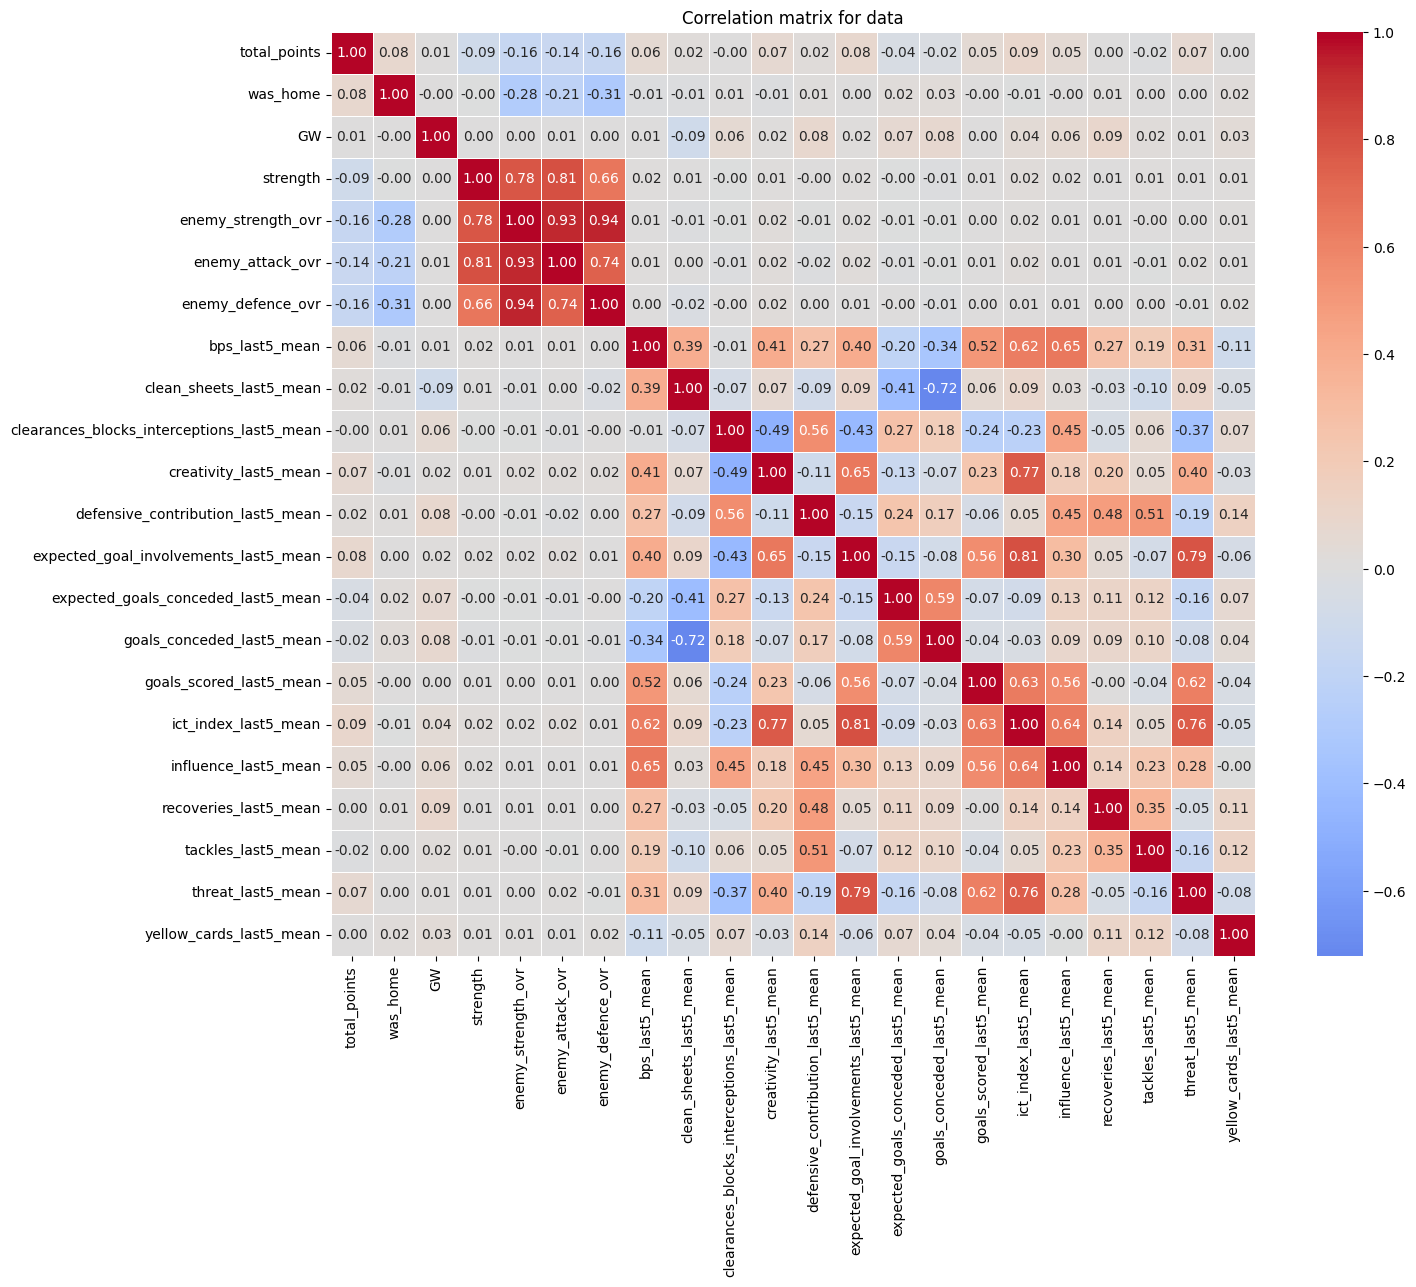

In [323]:
"""
Correlation matrix
"""

corr_df = merged_df.drop(columns=['name'])
corr = corr_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Correlation matrix for data", fontsize=12)
plt.show()

In [324]:
"""
Basic model created
"""

X = merged_df.drop(columns=["total_points", "name", "GW"])
y = merged_df["total_points"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# prosty model XGBoost
model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=8,
    learning_rate=0.01,
    subsample=0.3,
    colsample_bytree=0.4,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mape = mean_absolute_error(y_test, y_pred)
print("MSE:", mape)


MSE: 2.3555452823638916


In [325]:
results = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred
})

results = results.reset_index(drop=True)
print(results.head(10))

   y_true    y_pred
0       2  3.029362
1       1  3.225951
2       2  4.548952
3       4  3.382554
4       4  3.677773
5       4  3.285598
6       2  4.325050
7       2  1.858082
8       6  3.186255
9       2  3.960094


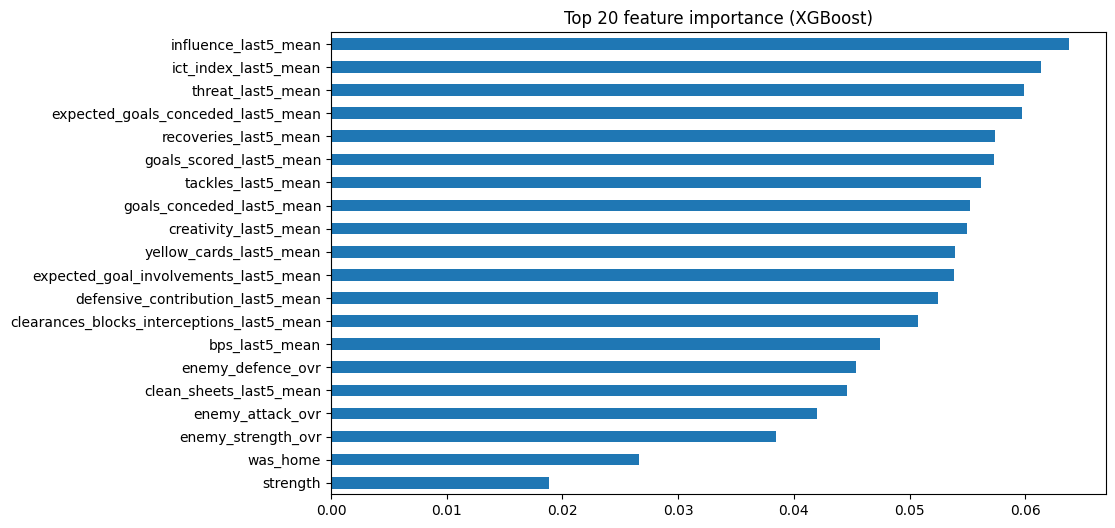

In [326]:
importance = pd.Series(
    model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importance.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 20 feature importance (XGBoost)")
plt.show()

In [327]:
merged_df

,name,total_points,was_home,GW,strength,enemy_strength_ovr,enemy_attack_ovr,enemy_defence_ovr,bps_last5_mean,clean_sheets_last5_mean,clearances_blocks_interceptions_last5_mean,creativity_last5_mean,defensive_contribution_last5_mean,expected_goal_involvements_last5_mean,expected_goals_conceded_last5_mean,goals_conceded_last5_mean,goals_scored_last5_mean,ict_index_last5_mean,influence_last5_mean,recoveries_last5_mean,tackles_last5_mean,threat_last5_mean,yellow_cards_last5_mean
3,Aaron Hickey,8,1,13,3,1055,1010,1100,8.00,0.00,2.33,1.73,3.33,0.09,0.74,1.00,0.0,1.77,6.20,4.33,1.00,9.67,0.0
4,Aaron Hickey,6,1,16,3,1095,1080,1110,10.25,0.25,3.75,1.88,5.00,0.13,0.59,0.75,0.0,1.95,8.75,4.25,1.25,8.75,0.0
5,Aaron Hickey,2,0,20,3,1130,1130,1130,12.80,0.40,3.60,1.88,4.60,0.10,0.62,0.60,0.0,1.68,7.72,4.40,1.00,7.00,0.0
6,Aaron Wan-Bissaka,1,0,1,3,1145,1120,1170,13.75,0.50,4.25,1.90,5.50,0.12,0.52,0.50,0.0,1.98,8.90,4.25,1.25,8.75,0.0
7,Aaron Wan-Bissaka,0,1,2,3,1180,1140,1220,15.50,0.50,4.25,7.72,5.50,0.12,0.48,1.00,0.0,3.12,12.60,5.25,1.25,10.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,Álex Jiménez Sánchez,1,1,20,5,1300,1340,1260,9.60,0.20,2.00,8.44,4.20,0.13,2.11,2.20,0.0,2.78,11.96,4.60,2.20,7.60,0.0
4299,Álex Jiménez Sánchez,0,1,21,3,1165,1130,1200,6.20,0.00,2.40,8.52,5.40,0.12,2.15,2.80,0.0,2.92,14.64,5.00,3.00,6.00,0.0
4300,Álex Jiménez Sánchez,2,0,22,3,1160,1110,1210,4.40,0.00,2.60,5.50,6.00,0.07,1.74,2.40,0.0,2.48,13.92,5.60,3.40,5.20,0.2
4301,Álex Jiménez Sánchez,7,1,23,4,1230,1170,1290,4.00,0.00,3.00,5.88,6.40,0.08,1.87,2.40,0.0,2.58,14.20,5.60,3.40,5.60,0.2


In [328]:
"""
Save final dataframe to file
"""
merged_df.to_csv('cleaned_data.csv', index=False)